🎬 ENHANCED VIDEO CORRECTIONS ANALYSIS - CSBS & CAPTION FOCUS
🔍 Loading CSV file...
✅ Loaded 51 records successfully!

📋 Available Columns (23):
   1. artifact_id
   2. original_classification
   3. page_type
   4. corrected_classification
   5. correction_value
   6. data_collection_quality
   7. classification_check
   8. image_caption_quality
   9. content_type
  10. timestamp
  11. current_frame_caption
  12. blip_generated_caption
  13. caption_source_evaluated
  14. caption_accuracy
  15. caption_completeness
  16. caption_relevance
  17. caption_issues
  18. improved_caption
  19. caption_quality_score
  20. frame_number
  21. crawler_output_bucket
  22. screenshot_filepath
  23. metadata_created_at

📊 BASIC STATISTICS
Total Records: 51
Date Range: 2025-08-21T09:43:43.209387 to 2025-08-21T14:00:26.103043
Unique Artifacts: 50

📱 Page Type Distribution:
  Meta Video CSBS: 51 (100.0%)

🎬 Content Type: meta_video

🚨 CSBS (CUBS) ACCURACY ANALYSIS
📊 Total items originally classified as

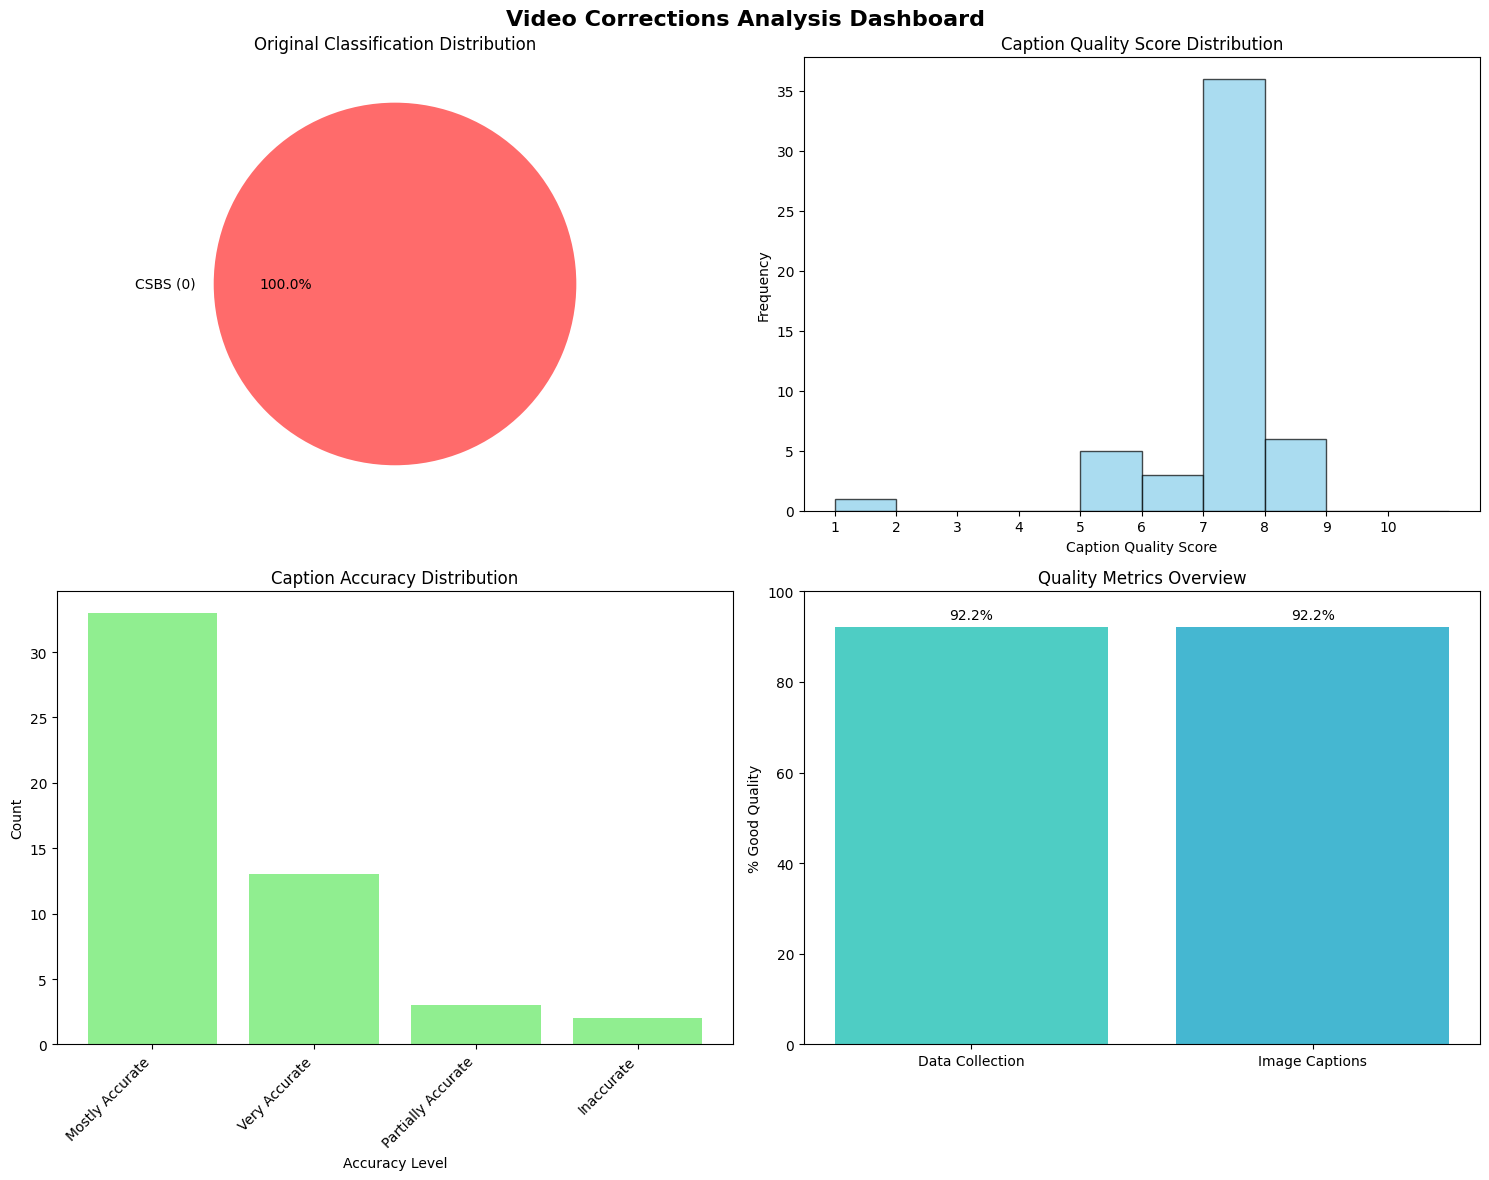


📋 ENHANCED SUMMARY REPORT

🎯 KEY FINDINGS:

📊 OVERVIEW:
  • Total Corrections: 51
  • Unique Artifacts: 50

🚨 CSBS (CUBS) ACCURACY:
  • CSBS Items Reviewed: 51
  • CSBS Correctly Identified: 21.6% (11/51)
  • CSBS False Positive Rate: 78.4%

📝 CAPTION PROBLEMS:
  • Problematic Captions (Partially/Inaccurate): 9.8%
  • Very Accurate Captions: 25.5%
  • Average Quality Score: 6.75/10
  • Low Quality Captions (≤4/10): 2.0%

🤖 BLIP CAPTION PERFORMANCE:
  • BLIP Usage Rate: 100.0%
  • BLIP Filled Missing Captions: 100.0%

💡 CRITICAL RECOMMENDATIONS:
  • 🔴 HIGH PRIORITY: CSBS detection needs improvement
  • ✅ Caption quality is acceptable
  • ✅ Good BLIP caption coverage
  • Review classification logic for items with low caption quality scores
  • Implement systematic caption quality checks before classification
    

📁 Detailed CSBS analysis exported to: csbs_detailed_analysis_20250821_143950.csv

✅ Enhanced analysis complete!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

def load_and_analyze_corrections(csv_path):
    """Load and analyze video corrections CSV file"""
    
    print("🔍 Loading CSV file...")
    try:
        df = pd.read_csv(csv_path)
        print(f"✅ Loaded {len(df)} records successfully!")
    except Exception as e:
        print(f"❌ Error loading CSV: {str(e)}")
        return None
    
    return df

def basic_statistics(df):
    """Generate basic statistics about the corrections data"""
    
    print("\n" + "="*60)
    print("📊 BASIC STATISTICS")
    print("="*60)
    
    print(f"Total Records: {len(df)}")
    print(f"Date Range: {df['timestamp'].min()} to {df['timestamp'].max()}")
    print(f"Unique Artifacts: {df['artifact_id'].nunique()}")
    
    # Page type breakdown
    if 'page_type' in df.columns:
        print("\n📱 Page Type Distribution:")
        page_counts = df['page_type'].value_counts()
        for page_type, count in page_counts.items():
            percentage = (count / len(df)) * 100
            print(f"  {page_type}: {count} ({percentage:.1f}%)")
    
    # Content type breakdown
    if 'content_type' in df.columns:
        print(f"\n🎬 Content Type: {df['content_type'].iloc[0] if len(df) > 0 else 'N/A'}")

def classification_analysis(df):
    """Analyze classification corrections"""
    
    print("\n" + "="*60)
    print("🎯 CLASSIFICATION ANALYSIS")
    print("="*60)
    
    # Original vs Corrected Classifications
    if 'original_classification' in df.columns and 'corrected_classification' in df.columns:
        print("\n📈 Original Classification Distribution:")
        orig_counts = df['original_classification'].value_counts()
        for classification, count in orig_counts.items():
            classification_name = "CSBS (Below Floor)" if classification == 0 else "Safe" if classification == 100 else f"Other ({classification})"
            percentage = (count / len(df)) * 100
            print(f"  {classification_name}: {count} ({percentage:.1f}%)")
        
        print("\n📊 Corrected Classification Distribution:")
        corr_counts = df['corrected_classification'].value_counts()
        for classification, count in corr_counts.items():
            classification_name = "CSBS (Below Floor)" if classification == 0 else "Safe" if classification == 100 else f"Other ({classification})"
            percentage = (count / len(df)) * 100
            print(f"  {classification_name}: {count} ({percentage:.1f}%)")
        
        # Classification changes
        print("\n🔄 Classification Changes:")
        changes = df.groupby(['original_classification', 'corrected_classification']).size()
        for (orig, corr), count in changes.items():
            orig_name = "CSBS" if orig == 0 else "Safe" if orig == 100 else f"Other ({orig})"
            corr_name = "CSBS" if corr == 0 else "Safe" if corr == 100 else f"Other ({corr})"
            
            if orig != corr:
                percentage = (count / len(df)) * 100
                print(f"  {orig_name} → {corr_name}: {count} ({percentage:.1f}%)")
        
        # Accuracy metrics
        correct_classifications = (df['original_classification'] == df['corrected_classification']).sum()
        accuracy = (correct_classifications / len(df)) * 100
        print(f"\n✅ Original Classification Accuracy: {accuracy:.1f}% ({correct_classifications}/{len(df)})")

def quality_analysis(df):
    """Analyze data quality metrics"""
    
    print("\n" + "="*60)
    print("📋 QUALITY ANALYSIS")
    print("="*60)
    
    # Data Collection Quality
    if 'data_collection_quality' in df.columns:
        print("\n🗂️ Data Collection Quality:")
        quality_counts = df['data_collection_quality'].value_counts()
        for quality, count in quality_counts.items():
            quality_name = "Good" if "Good" in str(quality) else "Bad" if "Bad" in str(quality) else str(quality)
            percentage = (count / len(df)) * 100
            print(f"  {quality_name}: {count} ({percentage:.1f}%)")
    
    # Image Caption Quality
    if 'image_caption_quality' in df.columns:
        print("\n🖼️ Image Caption Quality:")
        caption_quality_counts = df['image_caption_quality'].value_counts()
        for quality, count in caption_quality_counts.items():
            quality_name = "Good" if "Good" in str(quality) else "Bad" if "Bad" in str(quality) else str(quality)
            percentage = (count / len(df)) * 100
            print(f"  {quality_name}: {count} ({percentage:.1f}%)")

def caption_analysis(df):
    """Analyze caption-related metrics"""
    
    print("\n" + "="*60)
    print("📝 CAPTION ANALYSIS")
    print("="*60)
    
    # Caption Quality Scores
    if 'caption_quality_score' in df.columns:
        scores = df['caption_quality_score'].dropna()
        if len(scores) > 0:
            print(f"\n⭐ Caption Quality Scores (1-10 scale):")
            print(f"  Average: {scores.mean():.2f}")
            print(f"  Median: {scores.median():.2f}")
            print(f"  Range: {scores.min():.0f} - {scores.max():.0f}")
            print(f"  Standard Deviation: {scores.std():.2f}")
            
            # Score distribution
            print(f"\n📊 Score Distribution:")
            score_counts = scores.value_counts().sort_index()
            for score, count in score_counts.items():
                percentage = (count / len(scores)) * 100
                print(f"  Score {score}: {count} ({percentage:.1f}%)")
    
    # Caption Accuracy
    if 'caption_accuracy' in df.columns:
        print(f"\n🎯 Caption Accuracy Distribution:")
        accuracy_counts = df['caption_accuracy'].value_counts()
        for accuracy, count in accuracy_counts.items():
            percentage = (count / len(df)) * 100
            print(f"  {accuracy}: {count} ({percentage:.1f}%)")
    
    # Caption Completeness
    if 'caption_completeness' in df.columns:
        print(f"\n📋 Caption Completeness Distribution:")
        completeness_counts = df['caption_completeness'].value_counts()
        for completeness, count in completeness_counts.items():
            percentage = (count / len(df)) * 100
            print(f"  {completeness}: {count} ({percentage:.1f}%)")
    
    # Caption Relevance
    if 'caption_relevance' in df.columns:
        print(f"\n🔗 Caption Relevance Distribution:")
        relevance_counts = df['caption_relevance'].value_counts()
        for relevance, count in relevance_counts.items():
            percentage = (count / len(df)) * 100
            print(f"  {relevance}: {count} ({percentage:.1f}%)")
    
    # BLIP Caption Analysis
    if 'blip_generated_caption' in df.columns:
        blip_available = (df['blip_generated_caption'] != 'None').sum()
        blip_percentage = (blip_available / len(df)) * 100
        print(f"\n🤖 BLIP Generated Captions:")
        print(f"  Available: {blip_available} ({blip_percentage:.1f}%)")
        print(f"  Missing: {len(df) - blip_available} ({100 - blip_percentage:.1f}%)")
        
        if 'caption_source_evaluated' in df.columns:
            print(f"\n📝 Caption Source Evaluated:")
            source_counts = df['caption_source_evaluated'].value_counts()
            for source, count in source_counts.items():
                percentage = (count / len(df)) * 100
                print(f"  {source}: {count} ({percentage:.1f}%)")

def issues_analysis(df):
    """Analyze caption issues"""
    
    print("\n" + "="*60)
    print("⚠️ ISSUES ANALYSIS")
    print("="*60)
    
    if 'caption_issues' in df.columns:
        # Parse comma-separated issues
        all_issues = []
        for issues_str in df['caption_issues'].dropna():
            if issues_str != 'None':
                issues = [issue.strip() for issue in issues_str.split(',')]
                all_issues.extend(issues)
        
        if all_issues:
            print(f"\n🔍 Most Common Caption Issues:")
            issues_series = pd.Series(all_issues)
            issue_counts = issues_series.value_counts()
            
            for issue, count in issue_counts.head(10).items():
                percentage = (count / len(df)) * 100
                print(f"  {issue}: {count} ({percentage:.1f}%)")
        else:
            print(f"\n✅ No specific issues reported")

def bucket_analysis(df):
    """Analyze crawler bucket information"""
    
    print("\n" + "="*60)
    print("🗂️ BUCKET & STORAGE ANALYSIS")
    print("="*60)
    
    if 'crawler_output_bucket' in df.columns:
        print(f"\n📦 Crawler Output Buckets:")
        bucket_counts = df['crawler_output_bucket'].value_counts()
        for bucket, count in bucket_counts.head(10).items():
            percentage = (count / len(df)) * 100
            print(f"  {bucket}: {count} ({percentage:.1f}%)")

def create_visualizations(df):
    """Create visualizations for the data with CSBS accuracy as first plot"""
    
    print("\n" + "="*60)
    print("📊 CREATING VISUALIZATIONS")
    print("="*60)
    
    # Set up the plotting style
    plt.style.use('default')
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Video Corrections Analysis Dashboard', fontsize=16, fontweight='bold')
    
    # 1. CSBS (Cubs) Accuracy - FIRST PLOT (TOP LEFT)
    ax1 = axes[0, 0]
    if 'original_classification' in df.columns and 'corrected_classification' in df.columns:
        # Focus on items originally classified as CSBS
        csbs_items = df[df['original_classification'] == 0]
        
        if len(csbs_items) > 0:
            correctly_csbs = csbs_items[csbs_items['corrected_classification'] == 0]
            incorrectly_csbs = csbs_items[csbs_items['corrected_classification'] != 0]
            
            # Create pie chart data
            labels = ['✅ Actually CSBS (Cubs)', '❌ Not CSBS (False Positive)']
            sizes = [len(correctly_csbs), len(incorrectly_csbs)]
            colors = ['#51cf66', '#ff6b6b']  # Green for correct, red for incorrect
            explode = (0.05, 0.05)  # Slightly separate slices
            
            wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', 
                                             colors=colors, explode=explode, startangle=90)
            
            # Enhance text formatting
            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')
                autotext.set_fontsize(10)
            
            ax1.set_title(f'CSBS (Cubs) Accuracy\n({len(csbs_items)} items originally classified as CSBS)', 
                         fontweight='bold', fontsize=12)
            
            # Add accuracy percentage as subtitle
            accuracy = (len(correctly_csbs) / len(csbs_items)) * 100
            ax1.text(0, -1.3, f'Overall CSBS Accuracy: {accuracy:.1f}%', 
                    ha='center', fontsize=11, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.7))
        else:
            ax1.text(0.5, 0.5, 'No CSBS items found', ha='center', va='center', transform=ax1.transAxes)
            ax1.set_title('CSBS (Cubs) Accuracy - No Data', fontweight='bold')
    else:
        ax1.text(0.5, 0.5, 'Classification data not available', ha='center', va='center', transform=ax1.transAxes)
        ax1.set_title('CSBS (Cubs) Accuracy - No Data', fontweight='bold')
    
    # 2. Caption Quality Scores Distribution - TOP RIGHT
    ax2 = axes[0, 1]
    if 'caption_quality_score' in df.columns:
        scores = df['caption_quality_score'].dropna()
        if len(scores) > 0:
            # Create histogram with better styling
            n, bins, patches = ax2.hist(scores, bins=range(1, 12), alpha=0.8, 
                                       color='skyblue', edgecolor='black', linewidth=1)
            
            # Color bars based on quality level
            for i, patch in enumerate(patches):
                score = i + 1
                if score <= 4:
                    patch.set_facecolor('#ff6b6b')  # Red for low quality
                elif score <= 6:
                    patch.set_facecolor('#ffd43b')  # Yellow for medium quality
                else:
                    patch.set_facecolor('#51cf66')  # Green for high quality
            
            ax2.set_xlabel('Caption Quality Score')
            ax2.set_ylabel('Frequency')
            ax2.set_title(f'Caption Quality Distribution\n(Avg: {scores.mean():.1f}/10, n={len(scores)})', 
                         fontweight='bold')
            ax2.set_xticks(range(1, 11))
            ax2.grid(axis='y', alpha=0.3)
        else:
            ax2.text(0.5, 0.5, 'No caption quality scores', ha='center', va='center', transform=ax2.transAxes)
            ax2.set_title('Caption Quality - No Data', fontweight='bold')
    else:
        ax2.text(0.5, 0.5, 'Caption quality data not available', ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('Caption Quality - No Data', fontweight='bold')
    
    # 3. Caption Problems Breakdown - BOTTOM LEFT
    ax3 = axes[1, 0]
    if 'caption_accuracy' in df.columns:
        accuracy_counts = df['caption_accuracy'].value_counts()
        
        # Define colors for each accuracy level
        accuracy_colors = {
            'Very Accurate': '#51cf66',      # Green
            'Mostly Accurate': '#69db7c',    # Light Green
            'Partially Accurate': '#ffd43b', # Yellow
            'Inaccurate': '#ff6b6b'          # Red
        }
        
        # Create colors list matching the data
        colors = [accuracy_colors.get(acc, '#gray') for acc in accuracy_counts.index]
        
        bars = ax3.bar(range(len(accuracy_counts)), accuracy_counts.values, color=colors, alpha=0.8)
        ax3.set_xlabel('Accuracy Level')
        ax3.set_ylabel('Count')
        ax3.set_title('Caption Accuracy Problems', fontweight='bold')
        ax3.set_xticks(range(len(accuracy_counts)))
        ax3.set_xticklabels(accuracy_counts.index, rotation=45, ha='right')
        
        # Add value labels on bars
        for bar, value in zip(bars, accuracy_counts.values):
            ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                    str(value), ha='center', va='bottom', fontweight='bold')
        
        ax3.grid(axis='y', alpha=0.3)
    else:
        ax3.text(0.5, 0.5, 'Caption accuracy data not available', ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title('Caption Accuracy - No Data', fontweight='bold')
    
    # 4. Overall Performance Summary - BOTTOM RIGHT
    ax4 = axes[1, 1]
    
    # Calculate key performance metrics
    performance_metrics = []
    performance_values = []
    performance_colors = []
    
    # CSBS Accuracy
    if 'original_classification' in df.columns and 'corrected_classification' in df.columns:
        csbs_items = df[df['original_classification'] == 0]
        if len(csbs_items) > 0:
            correctly_csbs = csbs_items[csbs_items['corrected_classification'] == 0]
            csbs_accuracy = (len(correctly_csbs) / len(csbs_items)) * 100
            performance_metrics.append('CSBS\nAccuracy')
            performance_values.append(csbs_accuracy)
            performance_colors.append('#51cf66' if csbs_accuracy >= 80 else '#ffd43b' if csbs_accuracy >= 60 else '#ff6b6b')
    
    # Caption Quality (High quality rate)
    if 'caption_quality_score' in df.columns:
        scores = df['caption_quality_score'].dropna()
        if len(scores) > 0:
            high_quality = (scores >= 7).sum()
            high_quality_rate = (high_quality / len(scores)) * 100
            performance_metrics.append('High Quality\nCaptions')
            performance_values.append(high_quality_rate)
            performance_colors.append('#51cf66' if high_quality_rate >= 70 else '#ffd43b' if high_quality_rate >= 50 else '#ff6b6b')
    
    # Caption Accuracy (Very + Mostly Accurate)
    if 'caption_accuracy' in df.columns:
        accuracy_counts = df['caption_accuracy'].value_counts()
        good_accuracy = accuracy_counts.get('Very Accurate', 0) + accuracy_counts.get('Mostly Accurate', 0)
        good_accuracy_rate = (good_accuracy / accuracy_counts.sum()) * 100
        performance_metrics.append('Accurate\nCaptions')
        performance_values.append(good_accuracy_rate)
        performance_colors.append('#51cf66' if good_accuracy_rate >= 80 else '#ffd43b' if good_accuracy_rate >= 60 else '#ff6b6b')
    
    if performance_metrics:
        bars = ax4.bar(performance_metrics, performance_values, color=performance_colors, alpha=0.8)
        ax4.set_ylabel('Percentage (%)')
        ax4.set_title('Performance Summary', fontweight='bold')
        ax4.set_ylim(0, 100)
        
        # Add percentage labels on bars
        for bar, value in zip(bars, performance_values):
            ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                    f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')
        
        ax4.grid(axis='y', alpha=0.3)
        
        # Add performance legend
        legend_elements = [
            plt.Rectangle((0,0),1,1, color='#51cf66', alpha=0.8, label='Good (≥80% or ≥70%)'),
            plt.Rectangle((0,0),1,1, color='#ffd43b', alpha=0.8, label='Fair (60-79% or 50-69%)'),
            plt.Rectangle((0,0),1,1, color='#ff6b6b', alpha=0.8, label='Poor (<60% or <50%)')
        ]
        ax4.legend(handles=legend_elements, loc='upper right', fontsize=8)
    else:
        ax4.text(0.5, 0.5, 'Performance data not available', ha='center', va='center', transform=ax4.transAxes)
        ax4.set_title('Performance Summary - No Data', fontweight='bold')
    
    plt.tight_layout()
    
    # Save the plot
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"video_corrections_analysis_{timestamp}.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"📊 Visualizations saved as: {filename}")
    plt.show()

def csbs_accuracy_analysis(df):
    """Analyze CSBS (Cubs) classification accuracy specifically"""
    
    print("\n" + "="*60)
    print("🚨 CSBS (CUBS) ACCURACY ANALYSIS")
    print("="*60)
    
    if 'original_classification' not in df.columns or 'corrected_classification' not in df.columns:
        print("❌ Missing classification columns for CSBS analysis")
        return
    
    # Filter for originally classified as CSBS (0)
    csbs_items = df[df['original_classification'] == 0].copy()
    
    if len(csbs_items) == 0:
        print("❌ No items originally classified as CSBS found")
        return
    
    print(f"📊 Total items originally classified as CSBS: {len(csbs_items)}")
    
    # Check how many were correctly identified as CSBS
    correctly_csbs = csbs_items[csbs_items['corrected_classification'] == 0]
    incorrectly_csbs = csbs_items[csbs_items['corrected_classification'] != 0]
    
    csbs_accuracy = (len(correctly_csbs) / len(csbs_items)) * 100
    csbs_false_positive = (len(incorrectly_csbs) / len(csbs_items)) * 100
    
    print(f"\n🎯 CSBS Classification Results:")
    print(f"  ✅ Correctly identified as CSBS: {len(correctly_csbs)} ({csbs_accuracy:.1f}%)")
    print(f"  ❌ Incorrectly classified as CSBS: {len(incorrectly_csbs)} ({csbs_false_positive:.1f}%)")
    
    if len(incorrectly_csbs) > 0:
        print(f"\n🔍 Items incorrectly classified as CSBS were actually:")
        incorrect_breakdown = incorrectly_csbs['corrected_classification'].value_counts()
        for correct_class, count in incorrect_breakdown.items():
            class_name = "Safe" if correct_class == 100 else f"Other ({correct_class})"
            percentage = (count / len(incorrectly_csbs)) * 100
            print(f"    {class_name}: {count} ({percentage:.1f}%)")
    
    # Now check items originally classified as Safe
    safe_items = df[df['original_classification'] == 100].copy()
    
    if len(safe_items) > 0:
        print(f"\n📊 Total items originally classified as Safe: {len(safe_items)}")
        
        # Check how many Safe items were actually CSBS
        safe_to_csbs = safe_items[safe_items['corrected_classification'] == 0]
        correctly_safe = safe_items[safe_items['corrected_classification'] == 100]
        
        safe_accuracy = (len(correctly_safe) / len(safe_items)) * 100
        missed_csbs_rate = (len(safe_to_csbs) / len(safe_items)) * 100
        
        print(f"  ✅ Correctly identified as Safe: {len(correctly_safe)} ({safe_accuracy:.1f}%)")
        print(f"  ⚠️ Should have been CSBS (missed): {len(safe_to_csbs)} ({missed_csbs_rate:.1f}%)")
    
    # Overall CSBS detection performance
    total_should_be_csbs = len(df[df['corrected_classification'] == 0])
    total_detected_as_csbs = len(csbs_items)
    total_correctly_detected_csbs = len(correctly_csbs)
    
    if total_should_be_csbs > 0:
        csbs_recall = (total_correctly_detected_csbs / total_should_be_csbs) * 100
        csbs_precision = csbs_accuracy  # Same as accuracy for originally detected CSBS
        
        print(f"\n📈 Overall CSBS Detection Performance:")
        print(f"  🎯 Precision (of detected CSBS, how many are actually CSBS): {csbs_precision:.1f}%")
        print(f"  🔍 Recall (of all actual CSBS, how many were detected): {csbs_recall:.1f}%")
        print(f"  📊 Total items that should be CSBS: {total_should_be_csbs}")

def caption_problems_analysis(df):
    """Detailed analysis of caption problems and accuracy"""
    
    print("\n" + "="*60)
    print("📝 DETAILED CAPTION PROBLEMS ANALYSIS")
    print("="*60)
    
    # Caption Accuracy Deep Dive
    if 'caption_accuracy' in df.columns:
        print(f"\n🎯 Caption Accuracy Detailed Breakdown:")
        accuracy_counts = df['caption_accuracy'].value_counts()
        total_with_accuracy = accuracy_counts.sum()
        
        # Define accuracy levels and their implications
        accuracy_levels = {
            'Very Accurate': '✅ Excellent',
            'Mostly Accurate': '👍 Good', 
            'Partially Accurate': '⚠️ Problematic',
            'Inaccurate': '❌ Major Issues'
        }
        
        for accuracy, count in accuracy_counts.items():
            percentage = (count / total_with_accuracy) * 100
            status = accuracy_levels.get(accuracy, '❓ Unknown')
            print(f"  {status} - {accuracy}: {count} ({percentage:.1f}%)")
        
        # Calculate problematic captions (Partially Accurate + Inaccurate)
        problematic = accuracy_counts.get('Partially Accurate', 0) + accuracy_counts.get('Inaccurate', 0)
        problematic_rate = (problematic / total_with_accuracy) * 100
        print(f"\n⚠️ Total Problematic Captions: {problematic} ({problematic_rate:.1f}%)")
    
    # Caption Completeness Analysis
    if 'caption_completeness' in df.columns:
        print(f"\n📋 Caption Completeness Analysis:")
        completeness_counts = df['caption_completeness'].value_counts()
        total_with_completeness = completeness_counts.sum()
        
        completeness_levels = {
            'Very Complete': '✅ Comprehensive',
            'Mostly Complete': '👍 Adequate',
            'Partially Complete': '⚠️ Missing Info',
            'Incomplete': '❌ Severely Lacking'
        }
        
        for completeness, count in completeness_counts.items():
            percentage = (count / total_with_completeness) * 100
            status = completeness_levels.get(completeness, '❓ Unknown')
            print(f"  {status} - {completeness}: {count} ({percentage:.1f}%)")
        
        # Calculate incomplete captions
        incomplete = completeness_counts.get('Partially Complete', 0) + completeness_counts.get('Incomplete', 0)
        incomplete_rate = (incomplete / total_with_completeness) * 100
        print(f"\n📉 Total Incomplete Captions: {incomplete} ({incomplete_rate:.1f}%)")
    
    # Caption Relevance Analysis
    if 'caption_relevance' in df.columns:
        print(f"\n🔗 Caption Relevance Analysis:")
        relevance_counts = df['caption_relevance'].value_counts()
        total_with_relevance = relevance_counts.sum()
        
        relevance_levels = {
            'Very Relevant': '✅ Highly Relevant',
            'Mostly Relevant': '👍 Generally Relevant',
            'Partially Relevant': '⚠️ Somewhat Off-topic',
            'Not Relevant': '❌ Completely Off-topic'
        }
        
        for relevance, count in relevance_counts.items():
            percentage = (count / total_with_relevance) * 100
            status = relevance_levels.get(relevance, '❓ Unknown')
            print(f"  {status} - {relevance}: {count} ({percentage:.1f}%)")
        
        # Calculate irrelevant captions
        irrelevant = relevance_counts.get('Partially Relevant', 0) + relevance_counts.get('Not Relevant', 0)
        irrelevant_rate = (irrelevant / total_with_relevance) * 100
        print(f"\n🎯 Total Irrelevant Captions: {irrelevant} ({irrelevant_rate:.1f}%)")

def caption_quality_correlation(df):
    """Analyze correlation between caption quality and classification accuracy"""
    
    print("\n" + "="*60)
    print("🔍 CAPTION QUALITY vs CLASSIFICATION CORRELATION")
    print("="*60)
    
    if 'caption_quality_score' not in df.columns or 'original_classification' not in df.columns:
        print("❌ Missing required columns for correlation analysis")
        return
    
    # Analyze caption quality by classification type
    csbs_items = df[df['original_classification'] == 0]['caption_quality_score'].dropna()
    safe_items = df[df['original_classification'] == 100]['caption_quality_score'].dropna()
    
    if len(csbs_items) > 0 and len(safe_items) > 0:
        print(f"\n📊 Caption Quality by Original Classification:")
        print(f"  CSBS items - Average quality: {csbs_items.mean():.2f}/10 (n={len(csbs_items)})")
        print(f"  Safe items - Average quality: {safe_items.mean():.2f}/10 (n={len(safe_items)})")
        print(f"  Quality difference: {abs(csbs_items.mean() - safe_items.mean()):.2f} points")
    
    # Analyze classification accuracy by caption quality bins
    df_with_scores = df.dropna(subset=['caption_quality_score', 'original_classification', 'corrected_classification'])
    
    if len(df_with_scores) > 0:
        print(f"\n🎯 Classification Accuracy by Caption Quality:")
        
        # Create quality bins
        quality_bins = [(1, 3, 'Low (1-3)'), (4, 6, 'Medium (4-6)'), (7, 10, 'High (7-10)')]
        
        for min_score, max_score, label in quality_bins:
            bin_data = df_with_scores[
                (df_with_scores['caption_quality_score'] >= min_score) & 
                (df_with_scores['caption_quality_score'] <= max_score)
            ]
            
            if len(bin_data) > 0:
                correct_classifications = (bin_data['original_classification'] == bin_data['corrected_classification']).sum()
                accuracy = (correct_classifications / len(bin_data)) * 100
                print(f"  {label} quality captions: {accuracy:.1f}% accuracy ({correct_classifications}/{len(bin_data)})")

def blip_vs_original_caption_analysis(df):
    """Compare BLIP generated captions vs original captions"""
    
    print("\n" + "="*60)
    print("🤖 BLIP vs ORIGINAL CAPTION ANALYSIS")
    print("="*60)
    
    if 'blip_generated_caption' not in df.columns:
        print("❌ No BLIP caption data found")
        return
    
    # Check BLIP caption availability
    has_blip = df['blip_generated_caption'] != 'None'
    has_original = (df['current_frame_caption'] != 'No caption available') & (df['current_frame_caption'].notna())
    
    total_records = len(df)
    blip_available = has_blip.sum()
    original_available = has_original.sum()
    both_available = (has_blip & has_original).sum()
    
    print(f"\n📊 Caption Availability:")
    print(f"  Original captions available: {original_available} ({(original_available/total_records)*100:.1f}%)")
    print(f"  BLIP captions available: {blip_available} ({(blip_available/total_records)*100:.1f}%)")
    print(f"  Both available for comparison: {both_available} ({(both_available/total_records)*100:.1f}%)")
    
    # Analyze caption source evaluation
    if 'caption_source_evaluated' in df.columns:
        print(f"\n🔍 Which Caption Source Was Evaluated:")
        source_counts = df['caption_source_evaluated'].value_counts()
        for source, count in source_counts.items():
            percentage = (count / len(df)) * 100
            print(f"  {source}: {count} ({percentage:.1f}%)")
    
    # Compare quality scores between BLIP and Original captions
    if 'caption_source_evaluated' in df.columns and 'caption_quality_score' in df.columns:
        print(f"\n⭐ Caption Quality by Source:")
        
        for source in df['caption_source_evaluated'].dropna().unique():
            source_data = df[df['caption_source_evaluated'] == source]['caption_quality_score'].dropna()
            if len(source_data) > 0:
                avg_score = source_data.mean()
                print(f"  {source}: {avg_score:.2f}/10 average (n={len(source_data)})")
    
    # Analyze cases where BLIP was needed (no original caption)
    no_original_caption = df[~has_original]
    if len(no_original_caption) > 0:
        blip_filled_gap = no_original_caption[no_original_caption['blip_generated_caption'] != 'None']
        print(f"\n🔧 BLIP Filling Caption Gaps:")
        print(f"  Items with no original caption: {len(no_original_caption)} ({(len(no_original_caption)/total_records)*100:.1f}%)")
        print(f"  BLIP provided caption for: {len(blip_filled_gap)} ({(len(blip_filled_gap)/len(no_original_caption))*100:.1f}%)")

def generate_enhanced_summary_report(df):
    """Generate enhanced summary report focused on CSBS and caption problems"""
    
    print("\n" + "="*60)
    print("📋 ENHANCED SUMMARY REPORT")
    print("="*60)
    
    # Basic metrics
    total_records = len(df)
    unique_artifacts = df['artifact_id'].nunique() if 'artifact_id' in df.columns else 'N/A'
    
    # CSBS Accuracy Metrics
    csbs_metrics = {}
    if 'original_classification' in df.columns and 'corrected_classification' in df.columns:
        csbs_items = df[df['original_classification'] == 0]
        if len(csbs_items) > 0:
            correctly_csbs = csbs_items[csbs_items['corrected_classification'] == 0]
            csbs_metrics['csbs_accuracy'] = f"{(len(correctly_csbs) / len(csbs_items)) * 100:.1f}%"
            csbs_metrics['csbs_total'] = len(csbs_items)
            csbs_metrics['csbs_correct'] = len(correctly_csbs)
            csbs_metrics['csbs_false_positive_rate'] = f"{((len(csbs_items) - len(correctly_csbs)) / len(csbs_items)) * 100:.1f}%"
    
    # Caption Problem Metrics
    caption_metrics = {}
    if 'caption_accuracy' in df.columns:
        accuracy_counts = df['caption_accuracy'].value_counts()
        problematic = accuracy_counts.get('Partially Accurate', 0) + accuracy_counts.get('Inaccurate', 0)
        caption_metrics['problematic_captions'] = f"{(problematic / accuracy_counts.sum()) * 100:.1f}%"
        caption_metrics['accurate_captions'] = f"{(accuracy_counts.get('Very Accurate', 0) / accuracy_counts.sum()) * 100:.1f}%"
    
    # Quality Score Metrics
    quality_metrics = {}
    if 'caption_quality_score' in df.columns:
        scores = df['caption_quality_score'].dropna()
        if len(scores) > 0:
            quality_metrics['avg_quality'] = f"{scores.mean():.2f}/10"
            low_quality = (scores <= 4).sum()
            quality_metrics['low_quality_rate'] = f"{(low_quality / len(scores)) * 100:.1f}%"
    
    # BLIP Usage Metrics
    blip_metrics = {}
    if 'blip_generated_caption' in df.columns:
        blip_available = (df['blip_generated_caption'] != 'None').sum()
        blip_metrics['blip_usage'] = f"{(blip_available / total_records) * 100:.1f}%"
        
        no_original = df['current_frame_caption'] == 'No caption available'
        blip_filled_gaps = (no_original & (df['blip_generated_caption'] != 'None')).sum()
        blip_metrics['blip_gap_filling'] = f"{(blip_filled_gaps / no_original.sum()) * 100:.1f}%" if no_original.sum() > 0 else "N/A"
    
    print(f"""
🎯 KEY FINDINGS:

📊 OVERVIEW:
  • Total Corrections: {total_records}
  • Unique Artifacts: {unique_artifacts}

🚨 CSBS (CUBS) ACCURACY:
  • CSBS Items Reviewed: {csbs_metrics.get('csbs_total', 'N/A')}
  • CSBS Correctly Identified: {csbs_metrics.get('csbs_accuracy', 'N/A')} ({csbs_metrics.get('csbs_correct', 'N/A')}/{csbs_metrics.get('csbs_total', 'N/A')})
  • CSBS False Positive Rate: {csbs_metrics.get('csbs_false_positive_rate', 'N/A')}

📝 CAPTION PROBLEMS:
  • Problematic Captions (Partially/Inaccurate): {caption_metrics.get('problematic_captions', 'N/A')}
  • Very Accurate Captions: {caption_metrics.get('accurate_captions', 'N/A')}
  • Average Quality Score: {quality_metrics.get('avg_quality', 'N/A')}
  • Low Quality Captions (≤4/10): {quality_metrics.get('low_quality_rate', 'N/A')}

🤖 BLIP CAPTION PERFORMANCE:
  • BLIP Usage Rate: {blip_metrics.get('blip_usage', 'N/A')}
  • BLIP Filled Missing Captions: {blip_metrics.get('blip_gap_filling', 'N/A')}

💡 CRITICAL RECOMMENDATIONS:
  • {'🔴 HIGH PRIORITY: CSBS detection needs improvement' if csbs_metrics.get('csbs_accuracy', '0%').replace('%', '') and float(csbs_metrics.get('csbs_accuracy', '0%').replace('%', '')) < 80 else '✅ CSBS detection performing well'}
  • {'🔴 HIGH PRIORITY: Caption quality issues detected' if caption_metrics.get('problematic_captions', '0%').replace('%', '') and float(caption_metrics.get('problematic_captions', '0%').replace('%', '')) > 30 else '✅ Caption quality is acceptable'}
  • {'🟡 MEDIUM PRIORITY: Increase BLIP usage for missing captions' if blip_metrics.get('blip_usage', '0%').replace('%', '') and float(blip_metrics.get('blip_usage', '0%').replace('%', '')) < 50 else '✅ Good BLIP caption coverage'}
  • Review classification logic for items with low caption quality scores
  • Implement systematic caption quality checks before classification
    """)

def main():
    """Main analysis function with enhanced CSBS and caption analysis"""
    
    print("🎬 ENHANCED VIDEO CORRECTIONS ANALYSIS - CSBS & CAPTION FOCUS")
    print("="*70)
    
    # Get CSV file path from user
    csv_path = input("📁 Enter the path to your CSV file: ").strip().strip('"').strip("'")
    
    # Load data
    df = load_and_analyze_corrections(csv_path)
    if df is None:
        return
    
    # Display column information
    print(f"\n📋 Available Columns ({len(df.columns)}):")
    for i, col in enumerate(df.columns, 1):
        print(f"  {i:2d}. {col}")
    
    # Run all analyses
    basic_statistics(df)
    
    # Enhanced analyses focused on CSBS and captions
    csbs_accuracy_analysis(df)
    caption_problems_analysis(df)
    caption_quality_correlation(df)
    blip_vs_original_caption_analysis(df)
    
    # Original analyses
    classification_analysis(df)
    quality_analysis(df)
    issues_analysis(df)
    
    # Create visualizations
    try:
        create_visualizations(df)
    except Exception as e:
        print(f"⚠️ Could not create visualizations: {str(e)}")
    
    # Generate enhanced summary report
    generate_enhanced_summary_report(df)
    
    # Export detailed analysis
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    
    # Create detailed CSBS analysis export
    if 'original_classification' in df.columns and 'corrected_classification' in df.columns:
        csbs_analysis = []
        
        for index, row in df.iterrows():
            csbs_analysis.append({
                'artifact_id': row.get('artifact_id', ''),
                'original_classification': row.get('original_classification', ''),
                'corrected_classification': row.get('corrected_classification', ''),
                'csbs_correct': 'Yes' if (row.get('original_classification') == 0 and row.get('corrected_classification') == 0) else 'No',
                'false_positive': 'Yes' if (row.get('original_classification') == 0 and row.get('corrected_classification') != 0) else 'No',
                'missed_csbs': 'Yes' if (row.get('original_classification') != 0 and row.get('corrected_classification') == 0) else 'No',
                'caption_quality_score': row.get('caption_quality_score', ''),
                'caption_accuracy': row.get('caption_accuracy', ''),
                'blip_used': 'Yes' if row.get('blip_generated_caption', 'None') != 'None' else 'No'
            })
        
        csbs_df = pd.DataFrame(csbs_analysis)
        csbs_output_file = f"csbs_detailed_analysis_{timestamp}.csv"
        csbs_df.to_csv(csbs_output_file, index=False)
        print(f"\n📁 Detailed CSBS analysis exported to: {csbs_output_file}")
    
    print(f"\n✅ Enhanced analysis complete!")

if __name__ == "__main__":
    main()